In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os, sys

In [67]:
cd ..

/home/jovyan/ASTR_136


In [70]:
files = os.listdir('BIAS/Stuff')
biasdata = np.zeros((510, 765, len(files)))

In [77]:
cd BIAS/Stuff

/home/jovyan/ASTR_136/BIAS/Stuff


In [72]:
for i in range(len(files)):
    hdu = fits.open(files[i])
    biasdata[:,:, i] = hdu[0].data

In [73]:
bias_master_mean = np.mean(biasdata, axis =2)
bias_master_median = np.median(biasdata, axis =2)

In [78]:
cd ../..

/home/jovyan/ASTR_136


In [79]:
files_dark = os.listdir('DARK/')
dark_data = np.zeros((510, 765, len(files_dark)))

In [80]:
cd DARK

/home/jovyan/ASTR_136/DARK


In [86]:
exp_times =[]
for i in range(len(files_dark)):
    hdu_dark = fits.open(files_dark[i])
    dark_data[:,:, i] = hdu_dark[0].data #retrieving data from each individual fits file
    exp_time = hdu_dark[0].header['EXPTIME']
    exp_times.append(exp_time) 

In [87]:
exp_times = np.array(exp_times)

In [88]:
bias_master = bias_master_mean[:,:,None]
z = np.arange(1,41,1)
for i in z:
    dark_reduced = dark_data - bias_master #dark_master = individ dark fits subtracted by bias

In [89]:
dark_master = dark_reduced/exp_time

In [90]:
cd ..

/home/jovyan/ASTR_136


In [91]:
files_flat = [f for f in os.listdir('TWI/') if f.endswith('.fits')]
flat_data = np.zeros((510, 765, len(files_flat)))

In [92]:
cd TWI

/home/jovyan/ASTR_136/TWI


In [93]:
exp_time_flat = []
times = []
for i in range(len(files_flat)):
    hdu_flat = fits.open(files_flat[i])
    flat_data[:,:, i] = hdu_flat[0].data #retrieving data from each individual fits file
    exp_times_flat = hdu_flat[0].header['EXPTIME']
    time= hdu_flat[0].header['TIME-OBS'].split(':')
    times.append(time)
    exp_time_flat.append(exp_times_flat)
    exp_flat = np.array(exp_time_flat)

In [94]:
dark_mean = np.mean(dark_master, axis=2, keepdims=True)

In [95]:
flat_master = ((flat_data - bias_master)/exp_flat)-dark_mean #here it's still all 67 images

In [96]:
flat_mean = np.mean(flat_master, axis=2, keepdims=True) #collapses shape into (510,765,1)

In [98]:
science_image = flat_master/flat_mean

In [99]:
science_image

array([[[3.63593374, 1.58178144, 0.80778229, ..., 3.58096199,
         3.5849427 , 0.0210515 ],
        [3.65991769, 1.5938502 , 0.80328409, ..., 3.5723771 ,
         3.58893369, 0.02071604],
        [3.63439281, 1.58214198, 0.79782238, ..., 3.56193306,
         3.59282379, 0.02053328],
        ...,
        [3.73911172, 1.58750161, 0.8085803 , ..., 3.61973122,
         3.58836533, 0.02071353],
        [3.72649012, 1.58905662, 0.80332035, ..., 3.59922179,
         3.5714887 , 0.02050904],
        [3.71197408, 1.57938504, 0.80417205, ..., 3.61789994,
         3.60451464, 0.02080503]],

       [[3.66722042, 1.5839671 , 0.79793156, ..., 3.59426553,
         3.61519057, 0.02017288],
        [3.63839043, 1.58771983, 0.803662  , ..., 3.58750707,
         3.61693588, 0.02060112],
        [3.63564076, 1.57599695, 0.80525207, ..., 3.59067194,
         3.61420881, 0.02083874],
        ...,
        [3.75016031, 1.60271593, 0.80035082, ..., 3.62147365,
         3.58598043, 0.0205663 ],
        [3.7

In [59]:
science_median = np.median(science_image, axis=2, keepdims=True) #collapses shape into (510,765,1)

In [60]:
times = np.array(times)

In [62]:
times

array([['02', '55', '29.372'],
       ['02', '58', '55.727'],
       ['03', '02', '02.814'],
       ['02', '58', '38.879'],
       ['02', '55', '35.799'],
       ['03', '05', '33.765'],
       ['02', '58', '51.515'],
       ['03', '04', '56.309'],
       ['03', '05', '11.332'],
       ['03', '01', '40.911'],
       ['02', '55', '38.982'],
       ['02', '58', '43.076'],
       ['03', '11', '45.180'],
       ['03', '04', '48.759'],
       ['03', '05', '41.222'],
       ['02', '58', '26.212'],
       ['03', '17', '45.420'],
       ['03', '20', '39.579'],
       ['03', '18', '47.976'],
       ['03', '11', '00.174'],
       ['03', '15', '40.417'],
       ['03', '09', '45.590'],
       ['03', '23', '42.084'],
       ['03', '10', '15.152'],
       ['03', '10', '37.694'],
       ['03', '12', '52.650'],
       ['03', '13', '15.286'],
       ['03', '13', '37.765'],
       ['03', '12', '30.170'],
       ['03', '08', '55.561'],
       ['03', '14', '37.970'],
       ['03', '01', '51.894'],
       [

In [64]:
science_median.shape

(510, 765, 1)

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TypeError: unhashable type: 'numpy.ndarray'

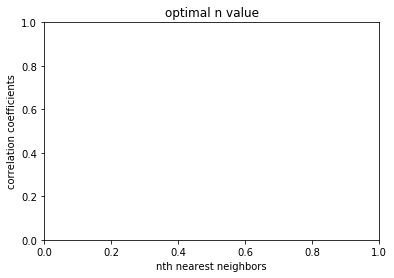

In [65]:
plt.xlabel('nth nearest neighbors') 
plt.ylabel('correlation coefficients') 
plt.title('optimal n value')
ax = plt.subplot(111)
plt.plot(times, science_median, label="projected" , color = 'darkblue')
plt.show() 

In [ ]:
#make flat_master by following same protocol but using TWI SKI
# make final flat image by subtracting flat_master - dark_master

In [ ]:
#do a best fit line and return goodness of fit
#times vs. sky brightess (time = min)
#